In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df = pd.read_csv("car_details _v3.csv")

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [ ]:
df.nunique()

,0
name,2058
year,29
selling_price,677
km_driven,921
fuel,4
seller_type,3
transmission,2
owner,5
mileage,393
engine,121


In [ ]:
df.drop(columns="name",inplace=True,axis=1)

In [ ]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [ ]:
le = LabelEncoder()



In [ ]:
df['fuel_encoded'] = le.fit_transform(df['fuel'])
df['seller_type_encoded'] = le.fit_transform(df['seller_type'])
df['transmission_encoded'] = le.fit_transform(df['transmission'])
df['owner_encoded'] = le.fit_transform(df['owner'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  8128 non-null   int64  
 1   selling_price         8128 non-null   int64  
 2   km_driven             8128 non-null   int64  
 3   fuel                  8128 non-null   object 
 4   seller_type           8128 non-null   object 
 5   transmission          8128 non-null   object 
 6   owner                 8128 non-null   object 
 7   mileage               7907 non-null   object 
 8   engine                7907 non-null   object 
 9   max_power             7913 non-null   object 
 10  torque                7906 non-null   object 
 11  seats                 7907 non-null   float64
 12  fuel_encoded          8128 non-null   int64  
 13  seller_type_encoded   8128 non-null   int64  
 14  transmission_encoded  8128 non-null   int64  
 15  owner_encoded        

In [ ]:
df.drop(columns=["fuel","seller_type","transmission","owner"],inplace=True,axis=1)

In [ ]:
df['max_power'] = df['max_power'].str.replace('bhp', '').str.strip()
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')


In [ ]:
df['engine'] = df['engine'].str.replace('CC', '')
df['engine'] = pd.to_numeric(df['engine'])

In [ ]:
df['mileage'] = df['mileage'].str.replace('kmpl', '')
df['mileage'] = df['mileage'].str.replace('km/kg', '')
df['mileage'] = pd.to_numeric(df['mileage'])

8128

In [ ]:
df.head()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,fuel_encoded,seller_type_encoded,transmission_encoded,owner_encoded
0,2014,450000,145500,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,1,1,1,0
1,2014,370000,120000,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,1,1,1,2
2,2006,158000,140000,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,3,1,1,4
3,2010,225000,127000,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,1,1,1,0
4,2007,130000,120000,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,3,1,1,0


<Axes: >

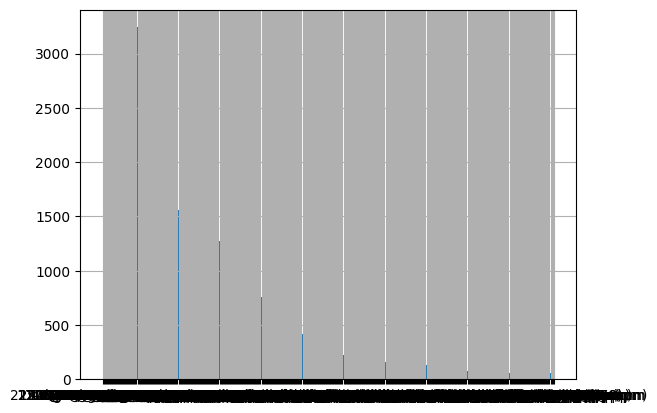

In [ ]:
df['torque'].hist()

In [ ]:
df['torque'] = le.fit_transform(df['torque'])

# EDA

In [ ]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,fuel_encoded,seller_type_encoded,transmission_encoded,owner_encoded
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7912.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,91.517919,222.429503,1.891117,0.890502,0.870817,0.814345
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,35.822499,133.017164,1.002313,0.394459,0.335423,1.221644
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,68.050000,118.000000,1.000000,1.000000,1.000000,0.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,193.000000,1.000000,1.000000,1.000000,0.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,102.000000,345.000000,3.000000,1.000000,1.000000,2.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,441.000000,3.000000,2.000000,1.000000,4.000000


In [ ]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'torque', 'fuel_encoded', 'seller_type_encoded', 'transmission_encoded',
       'owner_encoded'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  8128 non-null   int64  
 1   selling_price         8128 non-null   int64  
 2   km_driven             8128 non-null   int64  
 3   mileage               7907 non-null   float64
 4   engine                7907 non-null   float64
 5   max_power             7912 non-null   float64
 6   torque                8128 non-null   int64  
 7   fuel_encoded          8128 non-null   int64  
 8   seller_type_encoded   8128 non-null   int64  
 9   transmission_encoded  8128 non-null   int64  
 10  owner_encoded         8128 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 698.6 KB


In [ ]:
df2 = df.drop(columns= 'torque', axis=1 )

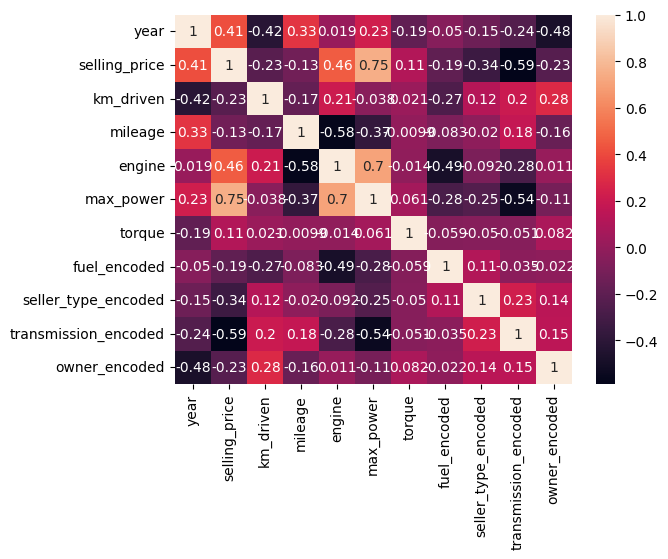

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
df.drop(columns="seats",inplace=True,axis=1)

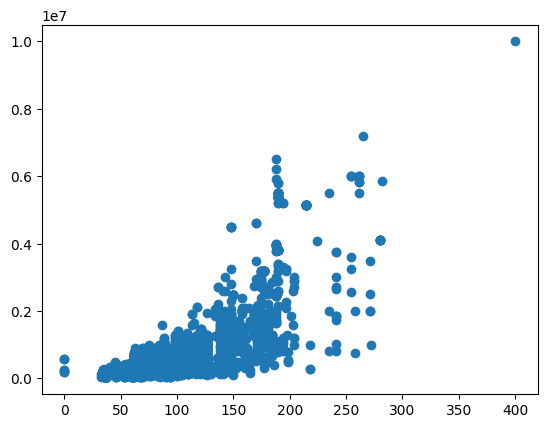

In [ ]:
plt.scatter(df["max_power"],df["selling_price"])

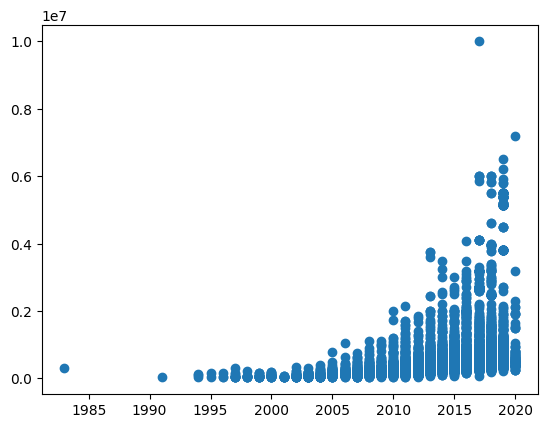

In [ ]:
plt.scatter(df["year"],df["selling_price"])

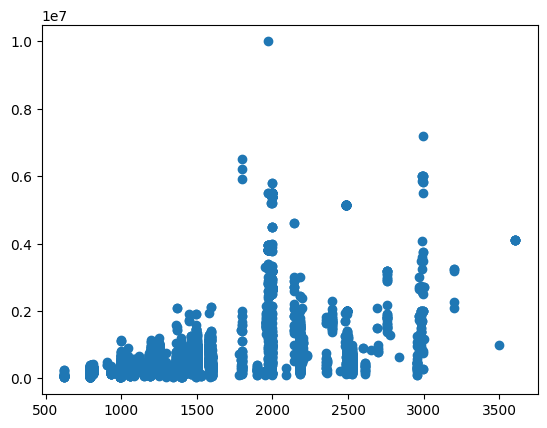

In [ ]:
plt.scatter(df["engine"],df["selling_price"])

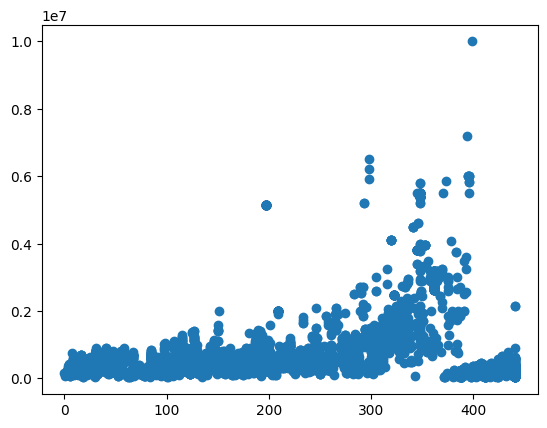

In [ ]:
plt.scatter(df["torque"],df["selling_price"])

In [ ]:
plt.s

In [ ]:
df.isnull().sum()

,0
year,0
selling_price,0
km_driven,0
mileage,221
engine,221
max_power,216
torque,0
fuel_encoded,0
seller_type_encoded,0
transmission_encoded,0


In [ ]:
df[['engine','max_power','mileage','selling_price']]

,engine,max_power,mileage,selling_price
0,1248.0,74.00,23.40,450000
1,1498.0,103.52,21.14,370000
2,1497.0,78.00,17.70,158000
3,1396.0,90.00,23.00,225000
4,1298.0,88.20,16.10,130000
...,...,...,...,...
8123,1197.0,82.85,18.50,320000
8124,1493.0,110.00,16.80,135000
8125,1248.0,73.90,19.30,382000
8126,1396.0,70.00,23.57,290000


array([[<Axes: title={'center': 'engine'}>,
        <Axes: title={'center': 'max_power'}>],
       [<Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'selling_price'}>]], dtype=object)

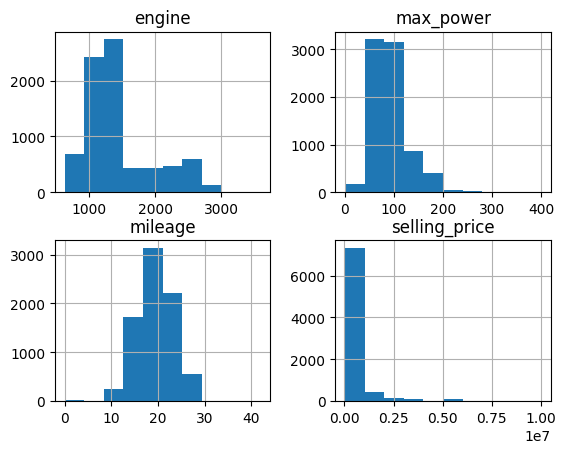

In [ ]:
df[['engine','max_power','mileage','selling_price']].hist()

In [ ]:
df.fillna(df.mean(),inplace=True)

# Model training

In [ ]:
# df = df[['GRE Score', 'TOEFL Score','CGPA',"Chance of Admit "]]
X = df.drop(columns = ["selling_price"])
y = df["selling_price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6502, 10)
(1626, 10)
(6502,)
(1626,)


In [ ]:
model = LinearRegression()

In [ ]:
hist = model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
result = pd.DataFrame({"Y test":y_test,"Y pred":y_pred})
result.head()

,Y test,Y pred
1971,198000,24499.353732
4664,500000,987662.202310
5448,425000,449709.856592
3333,150000,167290.782735
2316,525000,304473.698840


In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

266509.68565634085

## Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
ms_scaler = MinMaxScaler((0,1))
ss_scaler = StandardScaler()

scaled_X_train = ms_scaler.fit_transform(X_train)
scaled_X_test = ms_scaler.transform(X_test)

scaled_X_train = ss_scaler.fit_transform(scaled_X_train)
scaled_X_test = ss_scaler.transform(scaled_X_test)

In [ ]:
model = LinearRegression()
hist = model.fit(scaled_X_train,y_train)
y_pred = model.predict(scaled_X_test)
result = pd.DataFrame({"Y test":y_test,"Y pred":y_pred})
result.head()

,Y test,Y pred
1971,198000,24499.353732
4664,500000,987662.202310
5448,425000,449709.856592
3333,150000,167290.782735
2316,525000,304473.698840


In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

266509.6856563436

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

199986797026.4305

In [ ]:
metrics.r2_score(y_test,y_pred)

0.6949022971422989

In [ ]:
poly_converter = PolynomialFeatures(4)
poly_feature = poly_converter.fit(X_train)
poly_feature = poly_converter.transform(X_train)
poly_feature_test = poly_converter.transform(X_test)
print(X_train.shape)
print(poly_feature.shape)

(6502, 10)
(6502, 1001)


In [ ]:
poly_model = LinearRegression()
poly_model.fit(poly_feature, y_train)

LinearRegression()

In [ ]:
y_pred = poly_model.predict(poly_feature)
metrics.mean_absolute_error(y_train,y_pred)

167581.5451016611

In [ ]:
y_pred = poly_model.predict(poly_feature_test)
metrics.mean_absolute_error(y_test,y_pred)

179773.60325201918